## 2.2 深度学习基础及数学原理

深度学习没有那么难，甚至比有些传统机器学习更简单,用到的数学知识不需要特别高深。

本章会一边讲解深度学习的基本理论，一边动手用PyTorch实现

## 2.2.1 监督学习和无监督学习

监督学习、无监督学习、半监督学习、强化学习是常见的四个机器学习方法：

- 监督学习：通过已有训练样本（已知数据及其对应输出）训练得到一个最优模型（模型属于某个函数的集合，最优表示在某个评价准则下最佳），再利用这个模型将所有输入映射为相应输出。

- 无监督学习：与监督学习的不同之处，在于事先没有任何训练样本，需要直接对数据进行建模。 

- 半监督学习 ：训练阶段结合大量未标记数据和少量标签数据。

- 强化学习：设定回报函数（reward function），通过这个函数确认否越来越接近目标。类似训练宠物，做对给奖励做错给惩罚，最后达到训练目的。

着重介绍监督学习，因为后面课程都用监督学习。训练和验证输入数据既包含输入x，又包含对应输出y，即学习数据事先已给出正确答案。

## 2.2.2 线性回归 （Linear Regreesion）

线性回归利用回归分析，确定两种或两种以上变量间相互依赖定量关系的一种统计分析方法，运用十分广泛。

表达形式为y = w'x+e，e为误差服从均值0的正态分布。 

回归分析只包括一个自变量和一个因变量，二者关系可用一条直线近似表示，称为**一元**线性回归分析。
如果回归分析中包括两个或两个以上自变量，且因变量和自变量间是线性关系，称为**多元**线性回归分析。
摘自[百度百科](https://baike.baidu.com/item/线性回归/8190345)

线性回归对输入x与输出y有一个映射f，y=f(x),f的形式为aX+b。a和b是两个可调参数，训练就是训练a，b这两个参数。

用pyTorch代码做详细解释

In [ ]:
# import torch
# from torch.nn import Linear, Module, MSEloss
# from torch.optim import SGD,Adam

In [1]:
import torch
from torch.nn import Linear, Module, MSELoss
from torch.optim import SGD
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
torch.__version__

'1.6.0'

定义线性函数 $y = 5x + 7$，5和7是参数a和b。

In [ ]:
x = np.linspace(0, 20, 500)
y = 5 * x + 7
plt.plot(x, y)

生成一些随机点，作为训练数据

In [2]:
x = np.random.rand(256)
noise = np.random.randn(256) / 4
y = 5 * x + 7 + noise
df = pd.DataFrame()
df['x'] = x
df['y'] = y

显示生成的数据

In [ ]:
df.plot?

<AxesSubplot:xlabel='x', ylabel='y'>

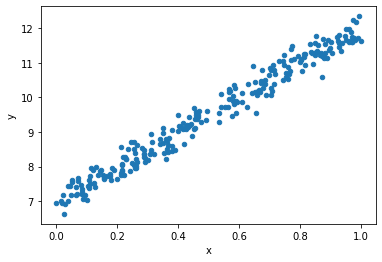

In [3]:
df.plot("x","y",kind="scatter")

In [ ]:
sns.lmplot(x='x', y='y', data=df)

随机生成点，PyTorch建立线性模型拟合，这就是训练的过程。只有一层线性模型，直接使用。

`Linear`表达式是 $y=w \cdot x+b$，$w$ 代表权重，$b$ 代表偏置。参数(1, 1)代表输入输出特征(feature)都是1。

损失函数用均方损失函数：`MSELoss`

优化器选择最常见优化方法 `SGD`，每一次迭代计算 `mini-batch` 梯度，

更新参数，学习率0.01

In [4]:
model = Linear(1, 1)
criterion = MSELoss()
optim = SGD(model.parameters(), lr=0.01)

In [14]:
model = Linear(1, 1)
criterion = MSELoss()
optim = torch.optim.Adam(model.parameters(), lr=0.01)

训练3000次

In [5]:
epochs = 3000

准备训练数据: `x_train`, `y_train` 形状是 (256, 1)， 代表 `mini-batch` 大小为256， `feature` 为1. 

`astype('float32')` 是为了直接转换为 `torch.float`.

In [12]:
x_train = x.reshape(-1, 1).astype('float32')
y_train = y.reshape(-1, 1).astype('float32')
print(x_train.shape, y_train.shape)

(256, 1) (256, 1)


开始训练

In [15]:
# 整理输入和输出数据，输入和输出一定是torch的Tensor类型
inputs = torch.from_numpy(x_train)
labels = torch.from_numpy(y_train)

for i in range(epochs):

    # 模型预测
    outputs = model(inputs)

    # 梯度置0，否则会累加
    optim.zero_grad()

    # 计算损失
    loss = criterion(outputs, labels)

    # 反向传播
    loss.backward()

    # 优化器默认方法优化
    optim.step()

    if (i % 500 == 0):
        # 每500次打印一下损失函数
        print('epoch {}, loss {:1.4f}'.format(i, loss.data.item()))

epoch 0, loss 110.1631
epoch 500, loss 18.2136
epoch 1000, loss 1.4838
epoch 1500, loss 0.2922
epoch 2000, loss 0.2074
epoch 2500, loss 0.1511


训练完看一下训练成果，`model.parameters()` 提取模型参数。 

$w$， $b$ 是所需要训练的模型参数。期望数据 $w=5$，$b=7$

In [16]:
[w, b] = model.parameters()
print(w.item(), b.item())

5.777682304382324 6.556463718414307


再次可视化模型，看训练的数据。

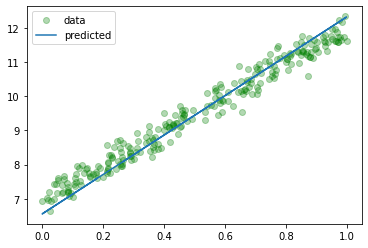

In [17]:
predicted = model.forward(torch.from_numpy(x_train)).data.numpy()

plt.plot(x_train, y_train, 'go', label='data', alpha=0.3)
plt.plot(x_train, predicted, label='predicted', alpha=1)
plt.legend()
plt.show()

##  2.2.3 损失函数(Loss Function)

损失函数（loss function）估量模型的预测值(output)与真实值（y_train）的不一致程度，非负实值函数。损失函数越小，模型鲁棒性越好。

训练模型的过程，就是通过不断迭代计算，使用**梯度下降优化算法**，使损失函数越来越小。损失函数越小表示算法达到意义上的最优。

重点：因为PyTorch使用**mini-batch**计算，所以损失函数的结果已经**对mini-batch取了平均**

常见（PyTorch内置）的损失函数有以下几个：

### nn.L1Loss:
输入x和目标y间差的绝对值，要求 **x** 和 **y** 的维度一样（向量或矩阵），loss 维度也对应一样

$ loss(x,y)=1/n\sum|x_i-y_i| $

### nn.NLLLoss:
多分类的负对数似然损失函数

$ loss(x, class) = -x[class]$

NLLLoss如果传递了weights参数，会对损失进行加权，公式就变成

$ loss(x, class) = -weights[class] * x[class] $

### nn.MSELoss:
均方损失函数 ，输入x和目标y间均方差

$ loss(x,y)=1/n\sum(x_i-y_i)^2 $

### nn.CrossEntropyLoss:

**多分类的交叉熵损失函数**，LogSoftMax和NLLLoss集成到一个类中，调用nn.NLLLoss函数，

可以理解为**CrossEntropyLoss() = log_softmax() + NLLLoss()**

$ \begin{aligned} loss(x, class) &= -\text{log}\frac{exp(x[class])}{\sum_j exp(x[j]))}\ &= -x[class] + log(\sum_j exp(x[j])) \end{aligned}  $
 
因为用了NLLLoss，所以也可传入weight参数，这时loss计算公式变为：
 
$ loss(x, class) = weights[class] * (-x[class] + log(\sum_j exp(x[j]))) $
 
一般多分类的情况会使用这个损失函数

### nn.BCELoss:
计算 x 与 y 间的二进制交叉熵。

$ loss(o,t)=-\frac{1}{n}\sum_i(t[i]* log(o[i])+(1-t[i])* log(1-o[i])) $ 

与NLLLoss类似，也可以添加权重参数： 

$ loss(o,t)=-\frac{1}{n}\sum_iweights[i]* (t[i]* log(o[i])+(1-t[i])* log(1-o[i])) $

用时要在该层前面加上 Sigmoid 函数。

## 2.2.4 梯度下降

梯度下降是使损失函数越来越小的优化算法，在求解**机器学习算法的模型参数**，即约束优化问题时，
梯度下降（Gradient Descent）是最常采用的方法之一。

梯度下降是**机器学习的核心**，了解它的含义也就了解了机器学习算法的含义。

### 梯度

对多元函数的参数求∂偏导数，把各个参数的偏导以向量形式写出来，就是梯度。
函数f(x,y)分别对x，y求偏导，求得的梯度向量就是(∂f/∂x, ∂f/∂y)T，简称grad f(x,y)或者▽f(x,y)。

几何上，梯度是**函数变化增加最快**的地方，沿着梯度向量方向，更容易找到函数最大值。
反过来说，沿着**梯度向量相反方向梯度减少最快**，更容易找到函数最小值。

最小化损失函数可以通过**梯度下降法一步步迭代求解**，得到最小化的损失函数和模型参数值。

### 梯度下降法直观解释

* 梯度下降法好比下山，并不知道下山的路，走一步算一步。
* 每走到一个位置时，求解当前位置梯度，沿着梯度负方向，也就是当前最陡峭的位置向下走一步。
* 然后继续求解当前位置梯度，向这一步所在位置沿最陡峭最易下山的位置走一步。
* 这样一步步走下去，一直走到觉得已经到山脚。

如下图所示，（此图摘自百度百科）
![](1.png)

走下去可能不能走到山脚，而是到某一个局部的山峰低处（局部最优解）。

这个问题在以前机器学习可能会遇到，因为机器学习的特征较少，很可能陷入局部最优解中出不来。

但是到了深度学习，动辄百万甚至上亿特征，出现这种情况的概率几乎为0，所以可以不用考虑这个问题。

### Mini-batch的梯度下降法

对整个训练集进行梯度下降时，必须**处理整个训练数据集**才能进行一步梯度下降，每一步梯度下降要对整个训练集进行一次处理。

如果训练数据集很大，处理速度很慢，不可能一次载入到内存或显存中，
把大数据集分成小数据集，一部分一部分训练，**训练子集称为Mini-batch**。

PyTorch用这种方法训练，上一章关于dataloader里的batch_size就是一个Mini-batch大小。

为了介绍更简洁，用吴恩达老师的 [deeplearning.ai](https://www.deeplearning.ai/deep-learning-specialization/) 课程板书。

* 普通梯度下降法，一个epoch只能进行**一次**梯度下降；
* Mini-batch梯度下降法，一个epoch可以进行****Mini-batch次**梯度下降。

<img src = "2.png" width=500>

**普通**batch梯度下降法和**Mini-batch**梯度下降法,代价函数的变化趋势如下图所示：

<img src = "3.png" width=500>

- 如果训练样本**比较小**，一次读到内存中，不需要用Mini-batch
- 如果训练样本**比较大**，不能一次读到内存中，必须用Mini-batch分批计算
- Mini-batch size计算规则如下，在内存允许的最大情况下用2的N次方个size

<img src = "4.png" width=500>

`torch.optim`实现各种优化算法的库。大部分常用优化算法都实现了，直接调用即可。

### torch.optim.SGD

随机梯度下降算法，带有动量（momentum）的算法作为一个可选参数可以设置：

In [19]:
# lr参数为学习率，SGD一般选择0.1 0.01.0.001
# 如果设置momentum，就是带有动量的SGD，可以不设置

optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9)

### torch.optim.RMSprop

除了带有动量Momentum梯度下降法，RMSprop（root mean square prop）也是一种可以加快梯度下降的算法。

RMSprop算法可以减小某些维度梯度更新波动较大的情况，梯度下降的速度变得更快

In [20]:
# 课程基本不会用到RMSprop，这里只给一个实例
optimizer = torch.optim.RMSprop(model.parameters(), lr=0.01, alpha=0.99)

### torch.optim.Adam

Adam优化算法:  结合 Momentum 和 RMSprop,形成一种适用于不同深度学习结构的优化算法

In [21]:
# lr，betas，eps用默认值即可，Adam是一个使用起来最简单的优化方法
optimizer = torch.optim.Adam(model.parameters(),
                             lr=0.001,
                             betas=(0.9, 0.999),
                             eps=1e-08)

## 2.2.5 方差/偏差

- 偏差度量学习算法的**期望预测与真实结果的偏离**，刻画学习算法本身的**拟合能力**
- 方差度量同样大小训练集的变动导致的**学习性能变化**，即模型的**泛化能力**
<img src="5.png" width=500>

图中可以看出
- **高偏差（high bias）**, 一般称为欠拟合（underfitting），模型没有很好适配现有数据，拟合度不够。
- **高方差（high variance）**, 一般称作过拟合（overfitting），模型对于训练数据拟合度太高，失去泛化能力。

如何解决这两种情况呢？

**欠拟合**：
- 增加网络结构，如增加隐藏层数目；
- 训练更长时间；
- 寻找合适网络架构，更大的NN结构；

**过拟合** ：
- 使用更多数据；
- 正则化（ regularization）；
- 寻找合适的网络结构；

例如上面的例子，可以计算出偏差:

In [22]:
print(5 - w.data.item(), 7 - b.data.item())

-0.7776823043823242 0.44353628158569336


## 2.2.6 正则化

正则化解决High variance问题，**正则化**在 Cost function加入一项正则化项，惩罚模型的复杂度，简单介绍一下正则化概念

### L1正则化
损失函数基础上加上权重参数的**绝对值**

$ L=E_{in}+\lambda{\sum_j} \left|w_j\right|$

### L2正则化
损失函数基础上加上权重参数的**平方和**

$ L=E_{in}+\lambda{\sum_j} w^2_j$

l1 相比于 l2 更容易获得稀疏解

[知乎](https://www.zhihu.com/question/37096933/answer/70507353)